<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
The "input layer" is the group of nodes that are directly "set" at the very beginning of computation. The question of whether or not the node should fire, ie. where the signal its expecting is supposed to come from, is outside the bounds of the computation itself (that is to say, you are not part of the computer); this corresponds to the axioms of a formal system, which are determined to be true "by default"

### Hidden Layer:
The "hidden layers" of a neural network are those layers consisting of nodes that both receive their signals from other nodes and pass on their signals to other nodes; no person or any other extra-computational entity is involved in this part of the computation.

### Output Layer:
The "output layer" is simply the group of nodes that do nothing with their signals; signals are fired, based on their inputs from other nodes, but the signals aren't fired *to* anything; as this is the final stage of the computation, it is now once again time for an extra-computational agent to "take" the signals from the output layer and do something with them.

### Neuron:
A black box that takes input and potentially produces output determined by that input a node in a graph that represents the flow of signals; a neuron is a place for a signal to come in and also to go out.

### Weight:
A kind of preprocessing of a signal, after is has gone out but before it has come in; the greater the weight, the greater the signal is amplified; this allows some connections between neurons to be "stronger" (ie, more likely to lead to the accepting neuron sending out a signal of its own), and manipulating these weights is what allows our neural network to get better.

### Activation Function:
The activation function of a neuron is the process by which inputs are potentially mapped to outputs; it can be thought of as a table that associates kinds of input signals with either no signal at all or some kind of output signal.

### Node Map:
A node map is a visual representation of the connections that exist between neurons in the network; it allows us to see at a glance how inputs are processed in order to produce output.

### Perceptron:
A perceptron is a very simple neural network: A single output node accepting arbitrary numbers of inputs and using an arbitrary activation function to determine when/how to send a signal.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

We begin by sending signals to the neurons in the input layer. There are no weights applied here, because we want our inputs (represented as signals) to actually be "put in" as we've specified them. The activation function of each neuron in the input layer determines whether those neurons will fire as a result of this direct input.

This part of the process happens ad infinitum and the details depend on the nature of the neural network, but some signals have been fired to an arbitrary neuron (either in a hidden layer or the output layer). Weights are applied (again, based on the nature of the network) to these signals, and their aggregate is then passed through the activation function corresponding to that neuron. A signal is fired if there's "enough" prompting it.

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [75]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(143)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x):
    sx = sigmoid(x)
    return sx * (1 - sx)

def train_perceptron(X, y):
    weights = 2 * np.random.random((len(X[0]) + 1, 1)) - 1
    output = lambda x: sigmoid(np.dot(x, weights[1:]) + weights[0])
    for _ in range(10000):
        activated_output = output(X)
        error = y - activated_output
        adjusted = error * sigmoid_deriv(activated_output)
        weights[0] += adjusted.mean()
        weights[1:] += np.dot(X.T, adjusted)
    return output(X)

In [85]:
X = np.array(df[['x1', 'x2']].values)
y = np.array(df['y'].apply(lambda x: [x]).tolist())
train_perceptron(X, y)

array([[0.99999967],
       [0.99287374],
       [0.99287374],
       [0.00642654]])

## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [121]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


/Users/chris/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


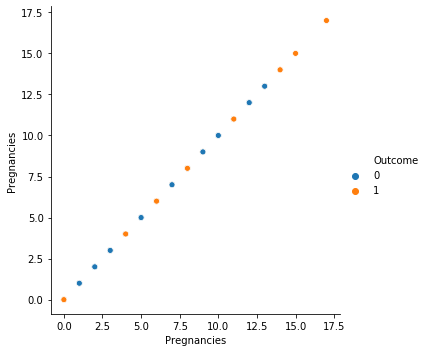

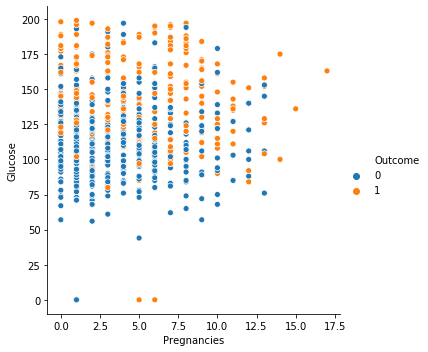

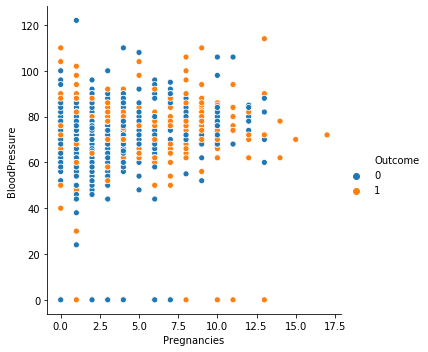

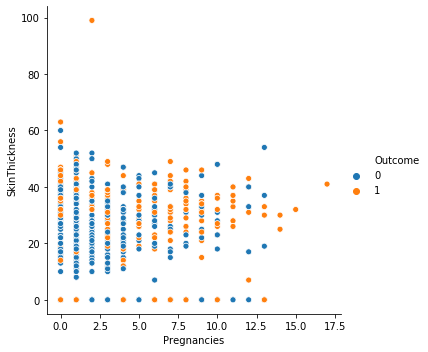

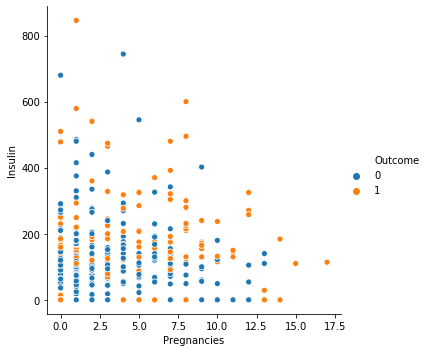

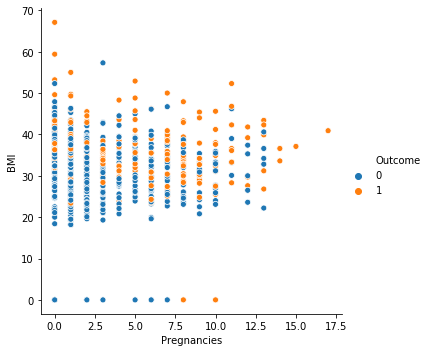

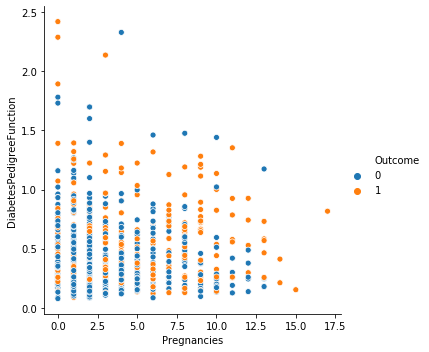

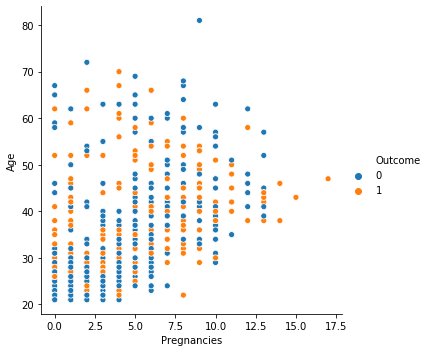

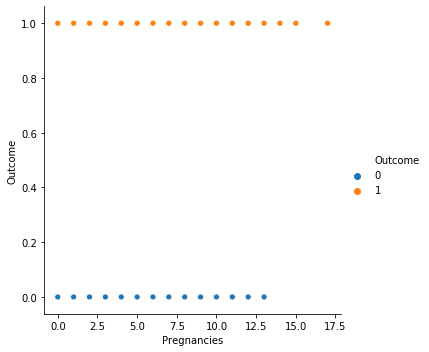

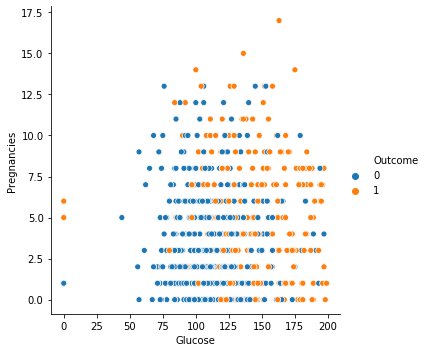

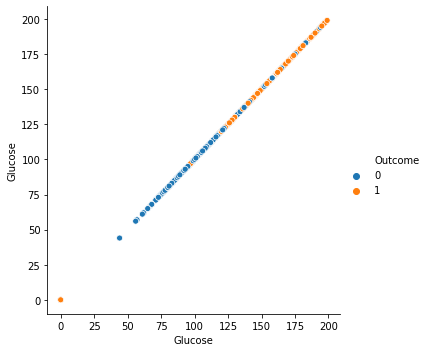

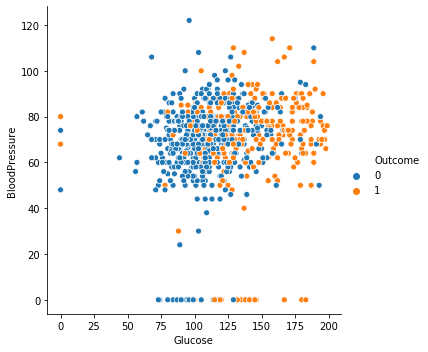

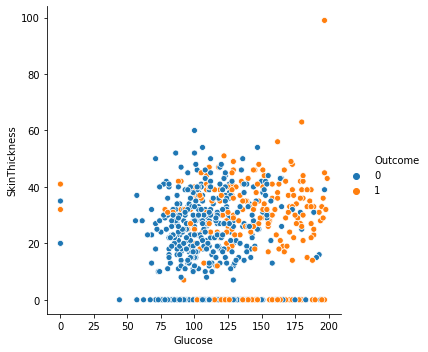

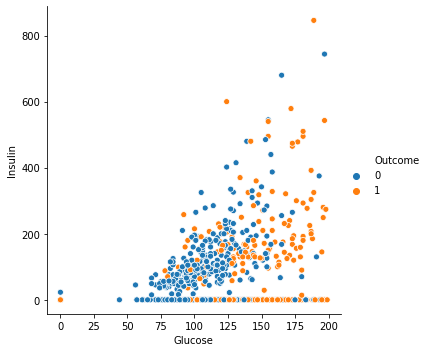

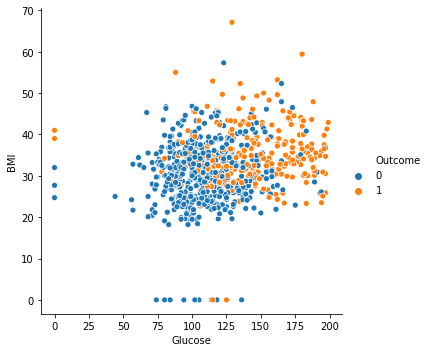

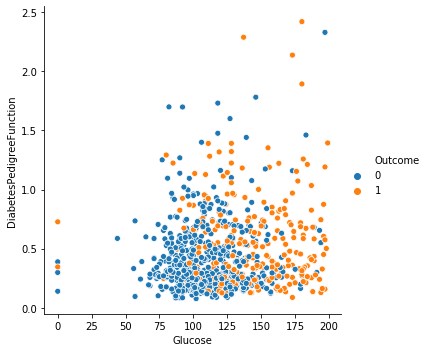

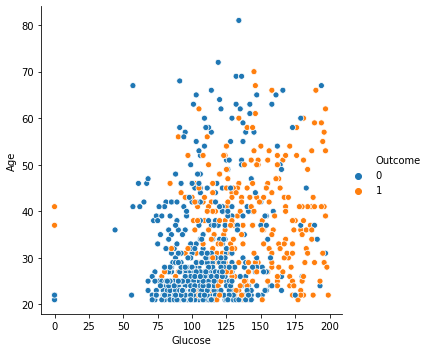

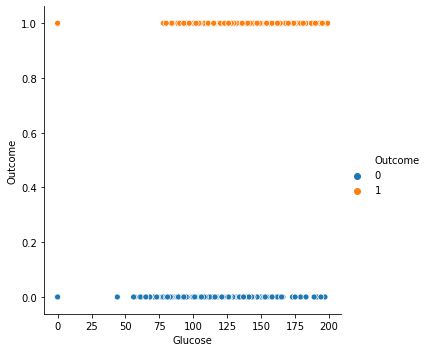

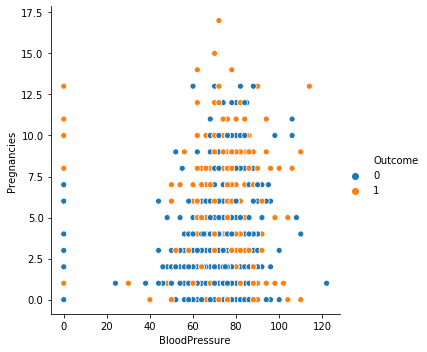

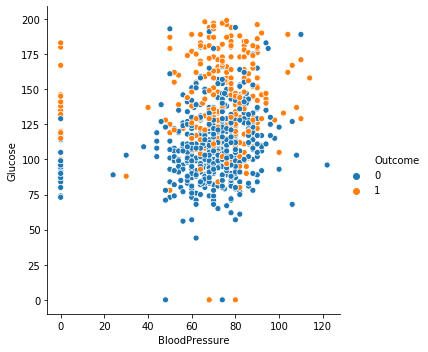

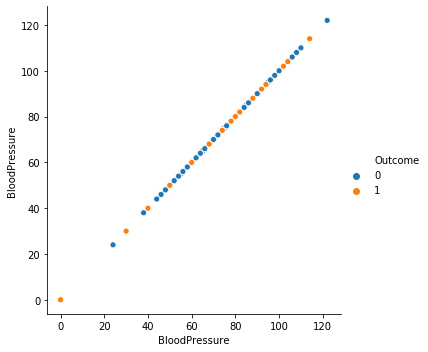

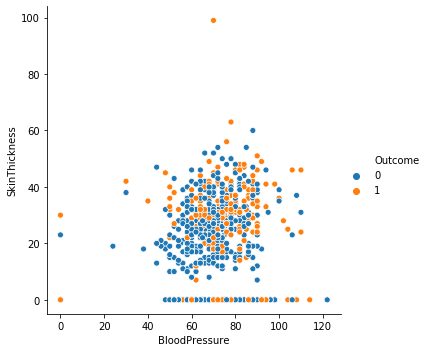

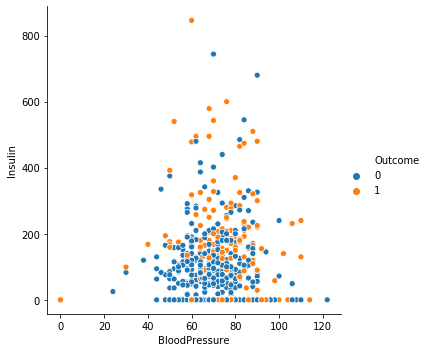

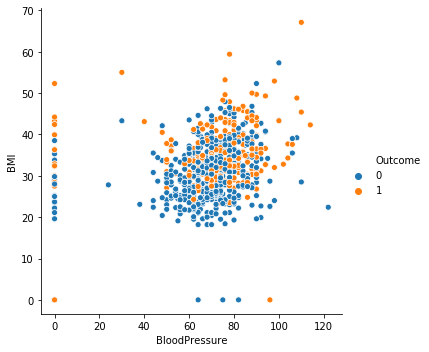

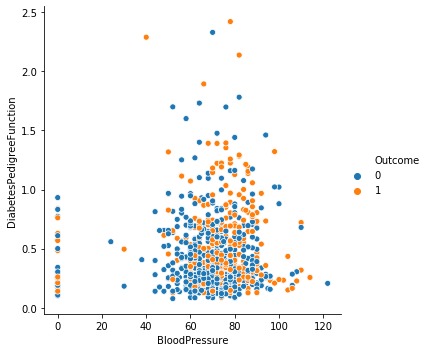

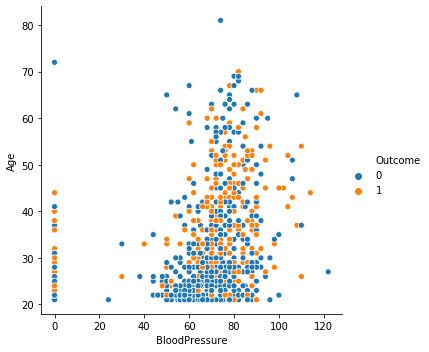

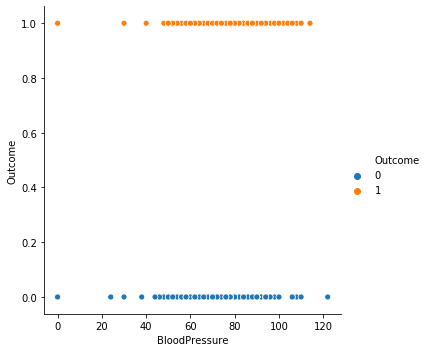

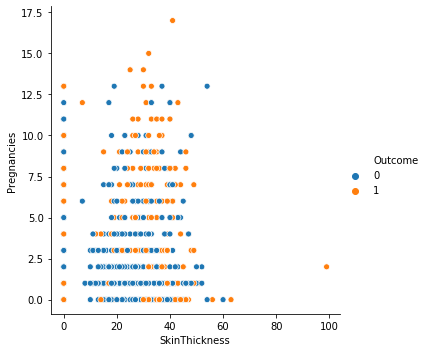

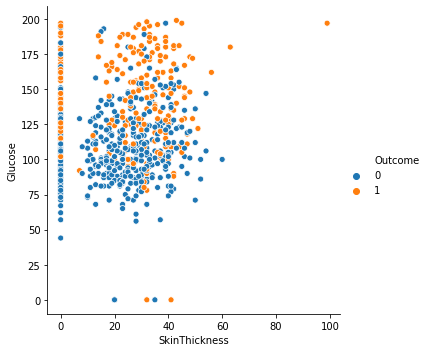

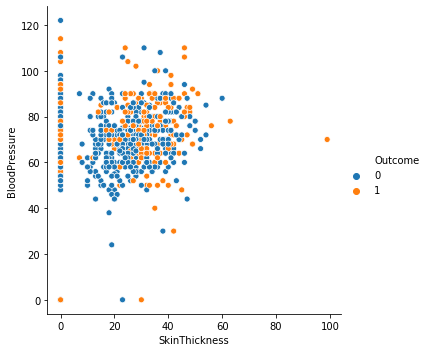

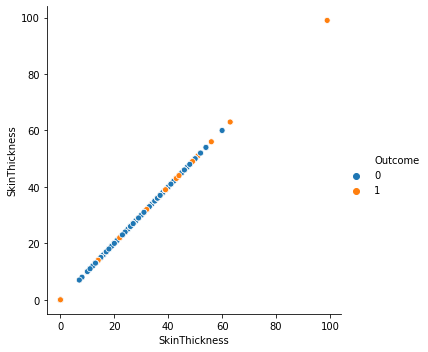

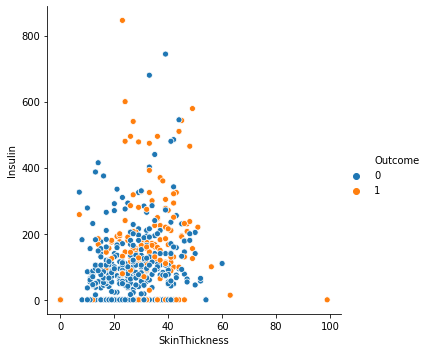

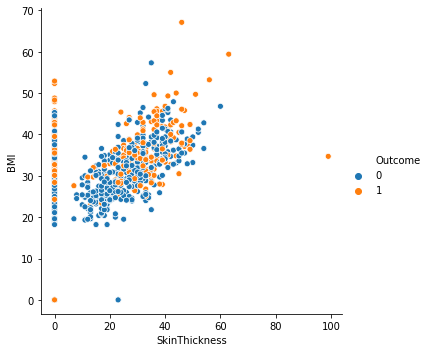

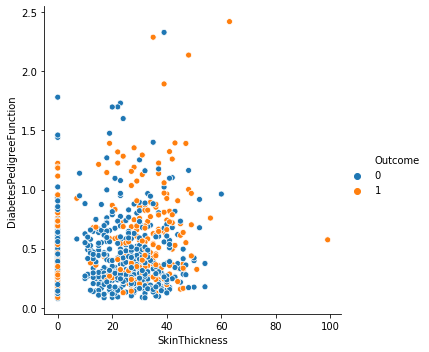

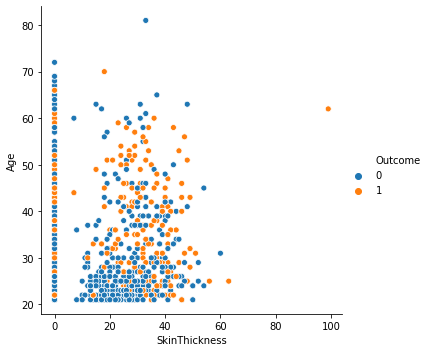

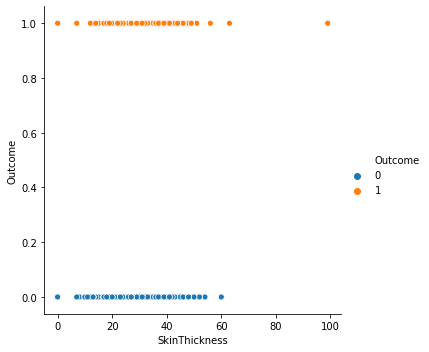

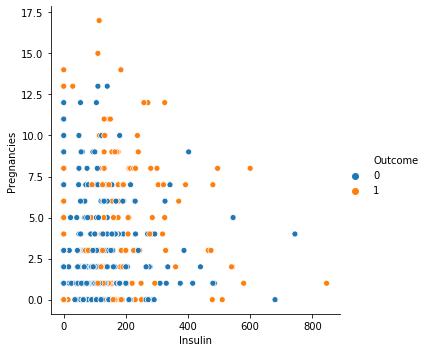

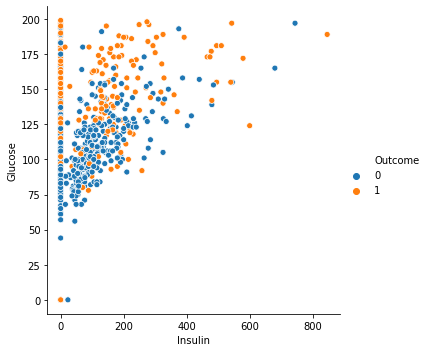

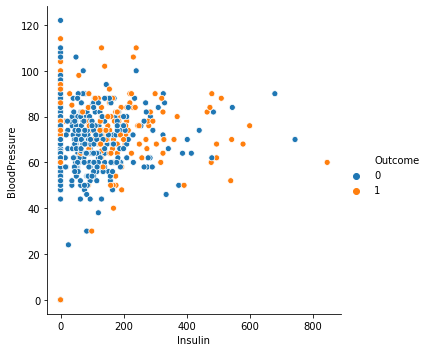

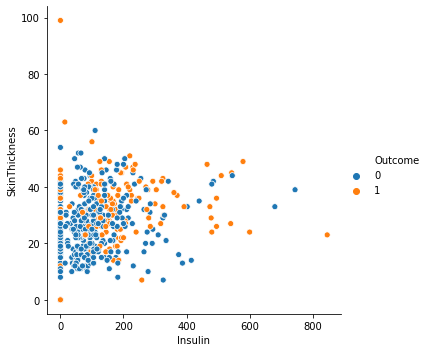

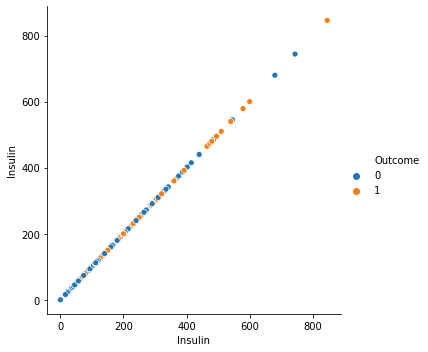

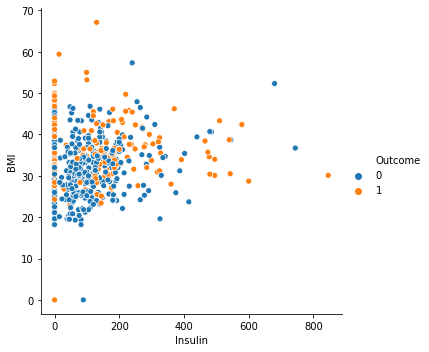

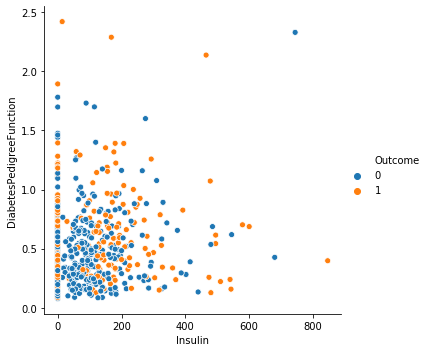

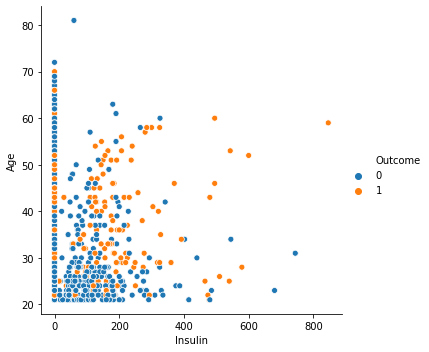

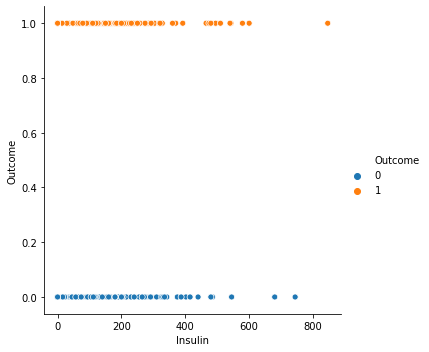

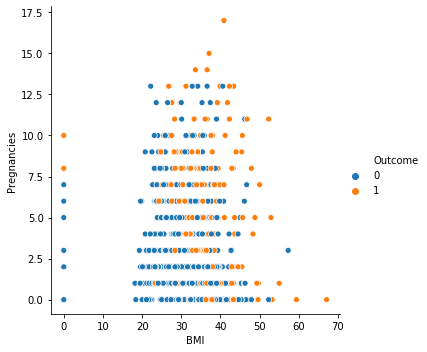

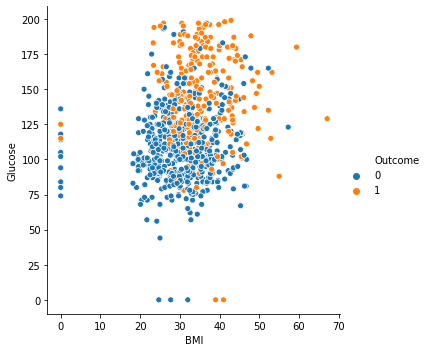

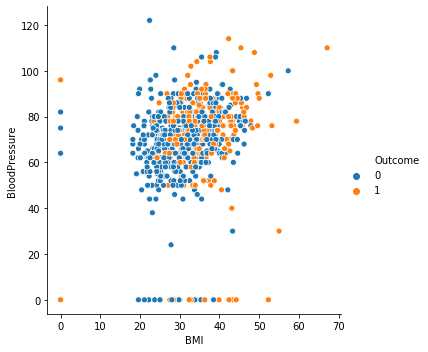

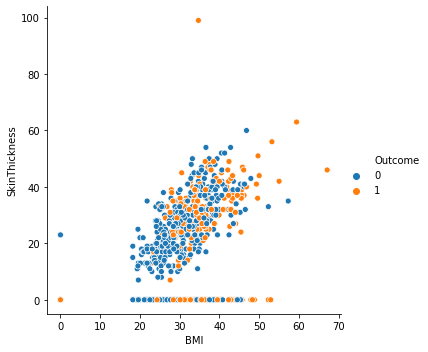

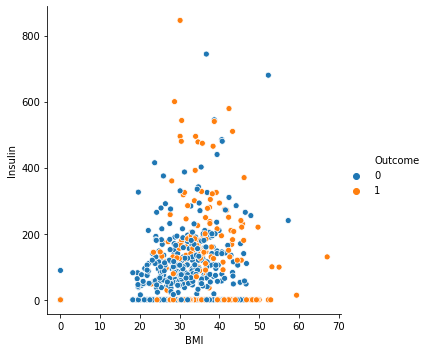

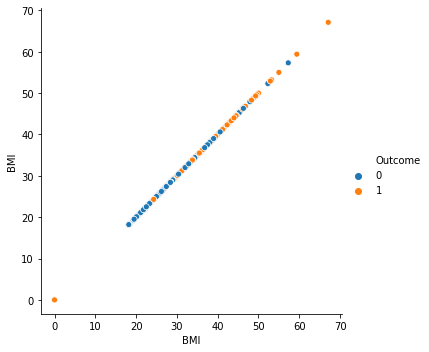

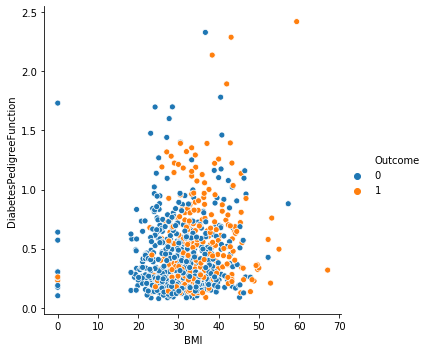

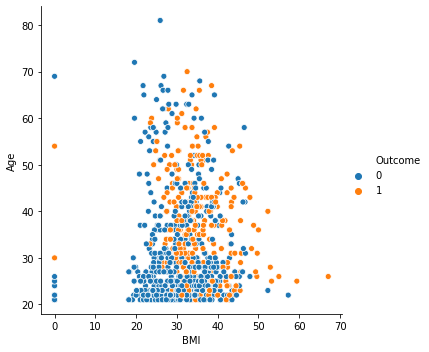

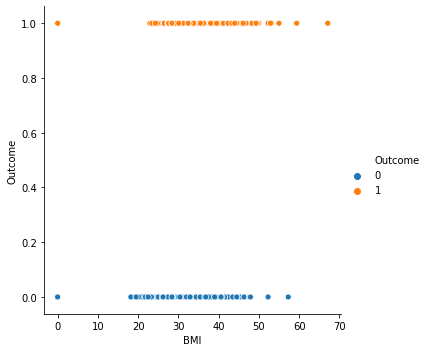

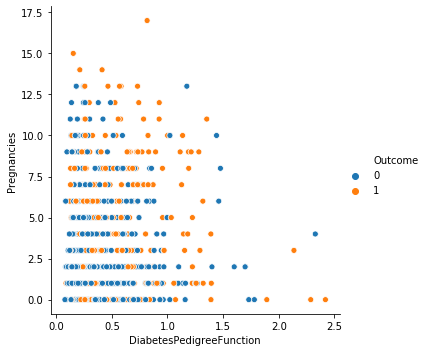

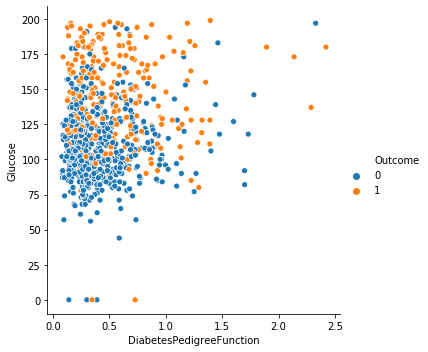

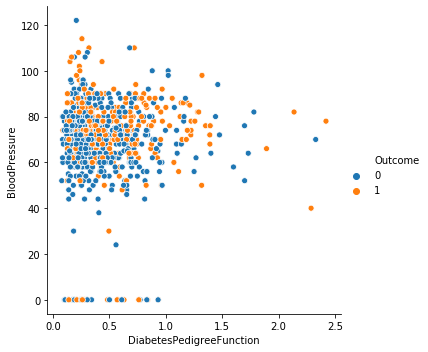

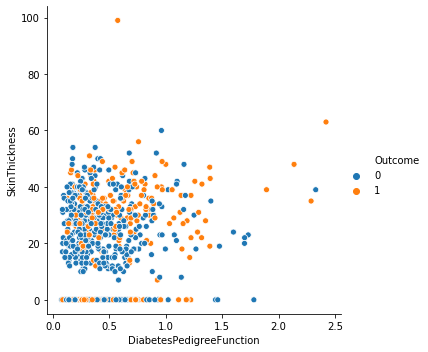

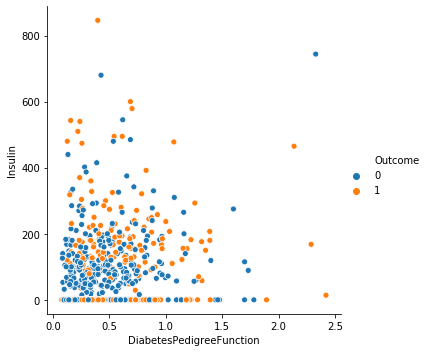

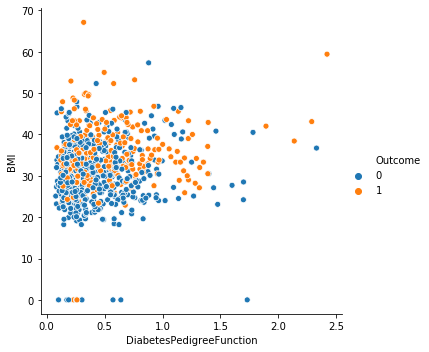

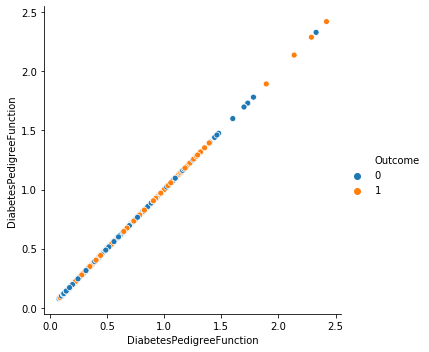

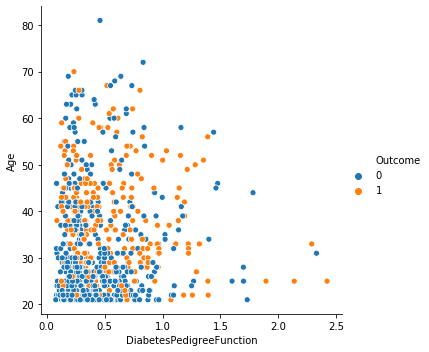

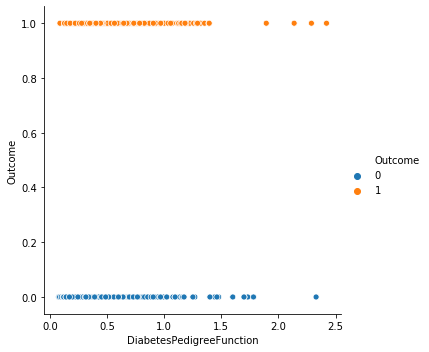

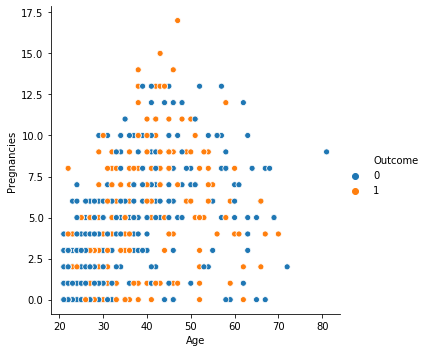

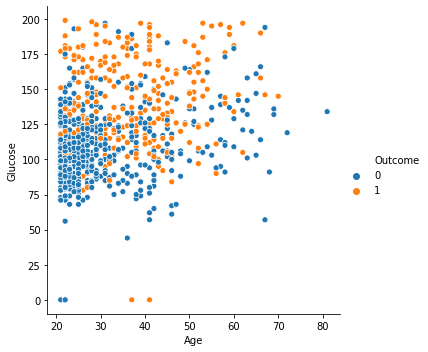

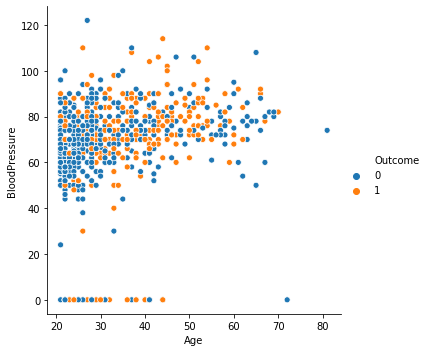

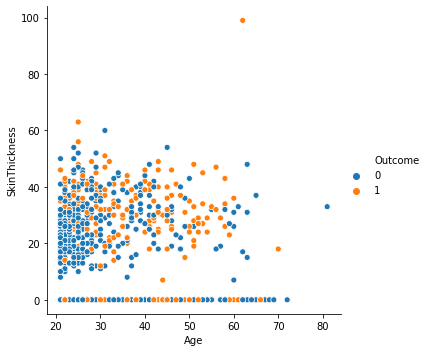

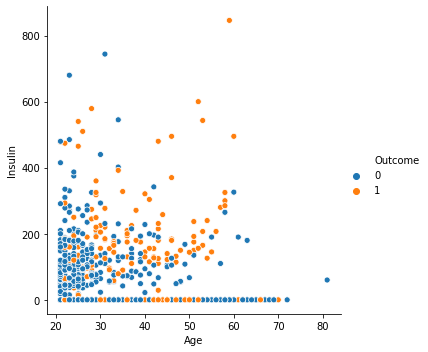

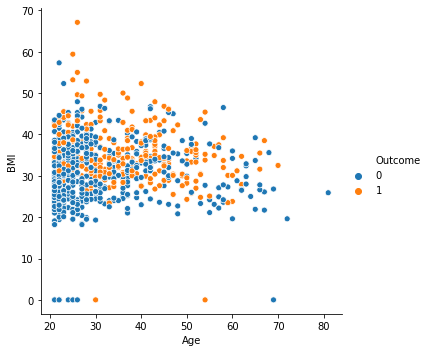

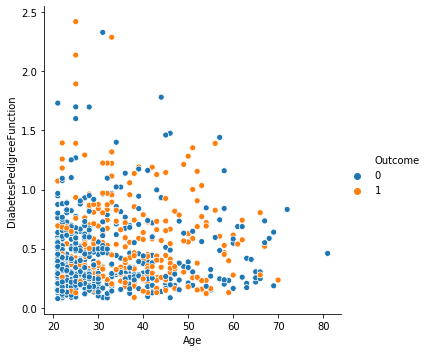

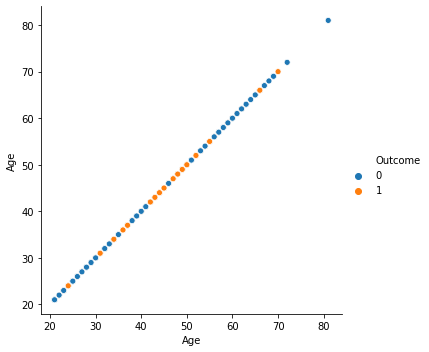

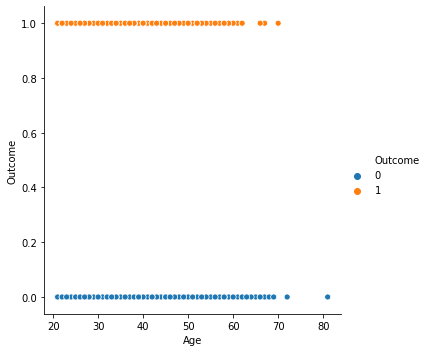

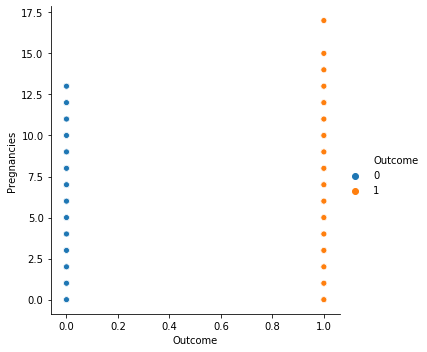

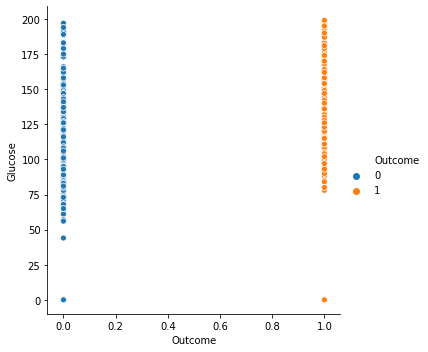

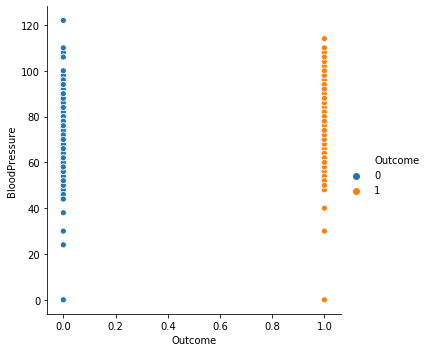

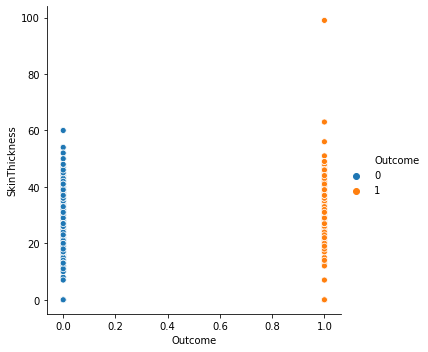

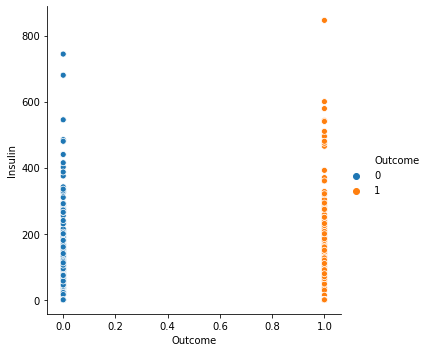

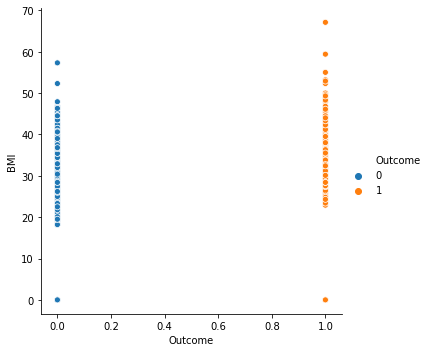

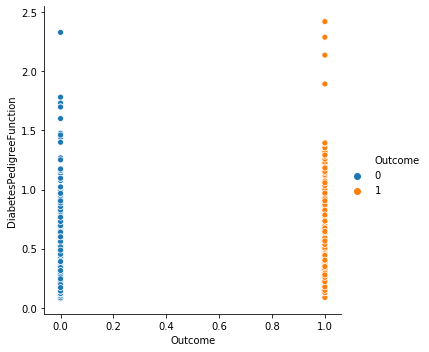

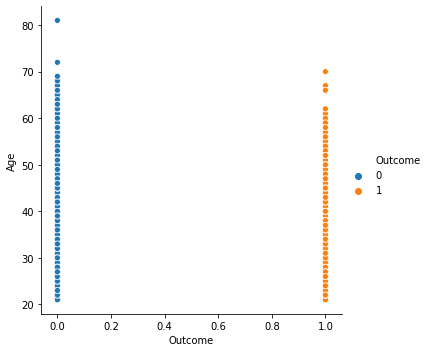

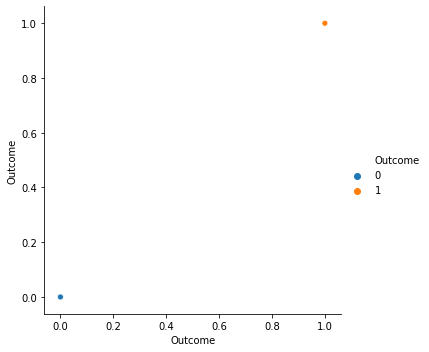

In [132]:
import seaborn as sns
feats = list(diabetes[:-1])
for a in feats:
    for b in feats:
        sns.relplot(x=a, y=b, hue='Outcome', data=diabetes)

Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [133]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = ['Glucose', 'BMI']

norm = Normalizer()
X2 = norm.transform(diabetes[feats])
X2

array([[0.97518461, 0.22139326],
       [0.95436003, 0.29865855],
       [0.99199174, 0.12630277],
       ...,
       [0.97735099, 0.21162476],
       [0.97263201, 0.23235098],
       [0.95050693, 0.31070334]])

In [113]:
# deviating from the template code quite a bit here

class Perceptron(object):
    
    def __init__(self, X, y):
        fsize = (len(X[0]) + 1, 1)
        fakes = 2 * np.random.random(fsize) - 1
        self.bias = fakes[0]
        self.weights = fakes[1:]
        self.X = X
        self.y = y
        self.n = 0
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = self.__sigmoid(x)
        return sx * (1 - sx)
    
    def predict(self):
        return self.__sigmoid(np.dot(self.X, self.weights) + self.bias)
    
    def crank(self, l=1):
        for _ in range(l):
            self.n += 1
            act_out = self.predict()
            err = self.y - act_out
            adj = err * self.__sigmoid_derivative(act_out)
            self.bias += adj.mean()
            self.weights += np.dot(self.X.T, adj)

In [114]:
p = Perceptron(X, y)
p.crank(10000)
p.predict()

array([[0.99999967],
       [0.99287756],
       [0.99287756],
       [0.00642308]])

In [115]:
y2 = np.array(diabetes['Outcome'].apply(lambda x: [x]).tolist())
y2

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [134]:
p = Perceptron(X2, y2)
p.crank(10000)
pred = p.predict()

In [135]:
(np.where(pred > 0.5, 1, 0) == y2).astype(int).sum() / len(y2)

0.3502604166666667

In [136]:
p.bias

array([5.08838874])

In [137]:
p.weights

array([[ 62.23425758],
       [-80.91794499]])

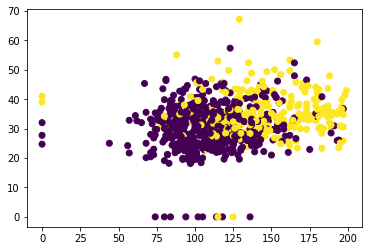

In [148]:
plt.scatter(diabetes['Glucose'], diabetes['BMI'], c=diabetes['Outcome'])

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?